Objective:
- learn how to plot learning curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# read in data
df = pd.read_csv("../../data/diabetes.csv", sep=",")

In [3]:
# prepare training and testing set
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, shuffle=True, random_state=89
)

In [4]:
# train the model
clf = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss", "error"]
clf.fit(
    X_train, y_train, 
    eval_set=eval_set, 
    eval_metric=eval_metric, 
    early_stopping_rounds=20, 
    verbose=False
)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [5]:
# evaluate the performance of the model
preds_test = clf.predict(X_test)
acc_test = accuracy_score(y_test, preds_test)
print("[INFO] The test accuracy of XGBoost is: %.2f%%" % (acc_test * 100))

[INFO] The test accuracy of XGBoost is: 77.06%


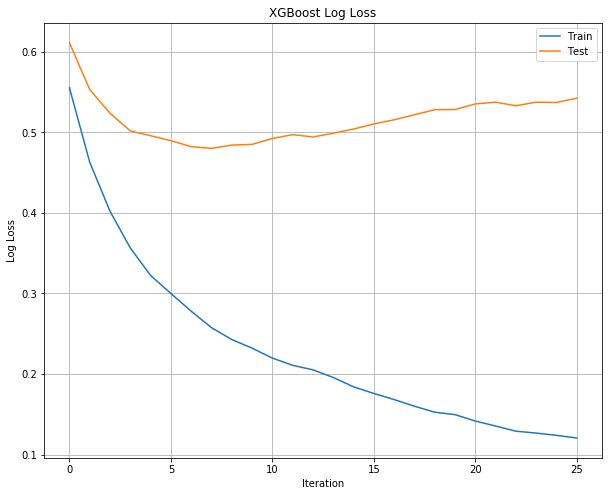

In [6]:
# plot log loss
evals_result = clf.evals_result()
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(evals_result["validation_0"]["logloss"], label="Train")
ax.plot(evals_result["validation_1"]["logloss"], label="Test")
ax.legend()
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("XGBoost Log Loss")
plt.grid()
plt.show()

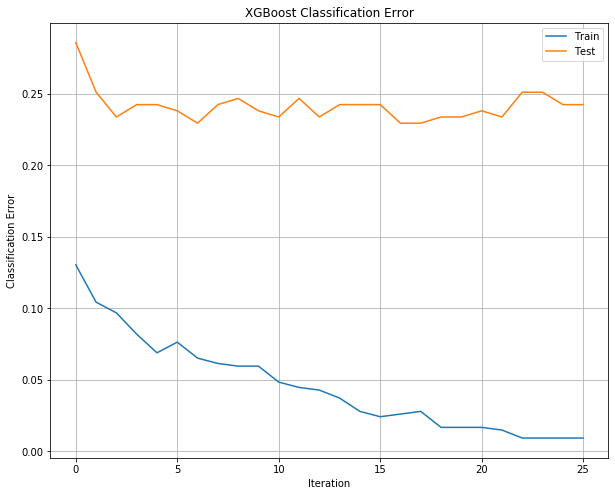

In [7]:
# plot classification error
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(evals_result["validation_0"]["error"], label="Train")
ax.plot(evals_result["validation_1"]["error"], label="Test")
ax.legend()
plt.xlabel("Iteration")
plt.ylabel("Classification Error")
plt.title("XGBoost Classification Error")
plt.grid()
plt.show()